![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/ocr/ocr_table_recognition_dl.ipynb)

## Deep Learning based Table extraction
![Cascade R-CNN](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-13_at_11.36.42_AM.png)
[Tutorial Notebook](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/ocr/ocr_table_recognition.ipynb "https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/ocr/ocr_table_recognition.ipynb")

You can now extract tables from images as pandas dataframe in 1 line of code, leveraging Spark OCR's ImageTableDetector, ImageTableCellDetector and ImageCellsToTextTable classes.


The ImageTableDetector is a deep-learning model designed to identify tables within images. It utilizes the CascadeTabNet architecture, which incorporates the Cascade mask Region-based Convolutional Neural Network High-Resolution Network (Cascade mask R-CNN HRNet).

The ImageTableCellDetector, on the other hand, is engineered to pinpoint cells within a table image. Its foundation is an image processing algorithm that identifies both horizontal and vertical lines.

The ImageCellsToTextTable applies Optical Character Recognition (OCR) to regions of cells within an image and returns the recognized text to the outputCol as a TableContainer structure.

It’s important to note that these annotators do not need to be invoked individually in NLU. Instead, you can simply load the `image_table_cell2text_table` model using the command `nlp.load('image_table_cell2text_table')`, and then use `nlp.predict` to make predictions on any document.


Powered by Spark OCR's [ImageTableDetector](https://nlp.johnsnowlabs.com/models?task=OCR+Table+Detection "https://nlp.johnsnowlabs.com/models?task=OCR+Table+Detection"), [ImageTableCellDetector](https://nlp.johnsnowlabs.com/docs/en/ocr_table_recognition#imagetablecelldetector "https://nlp.johnsnowlabs.com/docs/en/ocr_table_recognition#imagetablecelldetector"), [ImageCellsToTextTable](https://nlp.johnsnowlabs.com/docs/en/ocr_table_recognition#imagecellstotexttable "https://nlp.johnsnowlabs.com/docs/en/ocr_table_recognition#imagecellstotexttable")
Reference: [Cascade R-CNN: High Quality Object Detection and Instance Segmentation](https://arxiv.org/pdf/1906.09756.pdf "https://arxiv.org/pdf/1906.09756.pdf")

|**language**|**nlu.load() reference**|**Spark NLP Model Reference**|
|---|---|---|
|en|en.image_table_detector|[General Model for Table Detection](https://nlp.johnsnowlabs.com/2023/01/10/general_model_table_detection_v2_en_3_2.html "https://nlp.johnsnowlabs.com/2023/01/10/general_model_table_detection_v2_en_3_2.html")|



# Starting Session

In [1]:
from johnsnowlabs import nlp, visual
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nlp.install()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.0/656.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.5/548.5 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 326.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 10

<IPython.core.display.Javascript object>

127.0.0.1 - - [08/Jan/2024 00:22:24] "GET /login?code=wIOv8ZpGOWRkzEprlYy3hJo2oBdTrL HTTP/1.1" 200 -


<IPython.core.display.Javascript object>

Licenses extracted successfully
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-5.2.0-py3-none-any.whl to /usr/bin/python3
Installing /root/.johnsnowlabs/py_installs/spark_ocr-5.1.2-py3-none-any.whl to /usr/bin/python3
Installing /root/.johnsnowlabs/py_installs/spark_nlp-5.2.0-py2.py3-none-any.whl to /usr/bin/python3
Installed 3 products:
💊 Spark-Healthcare==5.2.0 installed! ✅ Heal the planet with NLP! 
🕶 Spark-OCR==5.1.2 installed! ✅ Empower your NLP with a set of eyes 
🚀 Spark-NLP==5.2.0 installed! ✅ State of the art NLP at scale 
👌 Launched cpu optimized session with with: 🚀Spark-NLP==5.2.0, 💊Spark-Healthcare==5.2.0, 🕶Spark-OCR==5.1.2, running on ⚡ PySpark==3.1.2


## Table recognition and Text Extraction

In [3]:
p = nlp.load('image_table_cell2text_table')

general_model_table_detection_v2 download started this may take some time.
Approximate size to download 264.7 MB


### Download and Display Image 🖼️

--2024-01-08 01:12:40--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/release/511/tests/datasets/ocr/table_image.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385071 (376K) [image/jpeg]
Saving to: ‘table_image.jpg’

table_image.jpg     100%[===================>] 376.05K  --.-KB/s    in 0.04s   

2024-01-08 01:12:40 (10.4 MB/s) - ‘table_image.jpg’ saved [385071/385071]



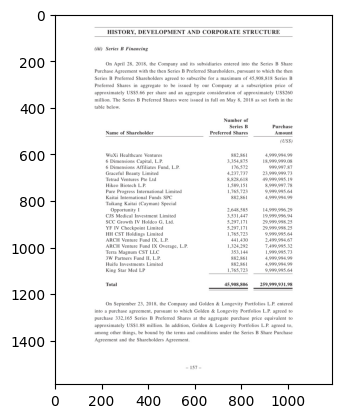

In [9]:
! wget https://raw.githubusercontent.com/JohnSnowLabs/nlu/release/511/tests/datasets/ocr/table_image.jpg
image_path = '/content/table_image.jpg'
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

#### Now let's use these images and let's see what magic nlp can produce in a line 🪄

In [11]:
dfs = p.predict(image_path)
for df in dfs :
  print(dfs.to_markdown())

|    | col0                                | col1               | col2           |
|---:|:------------------------------------|:-------------------|:---------------|
|  0 |                                     | Number of.         |                |
|  1 |                                     | Series B           | Purchase       |
|  2 | Name of Shareholder                 | Preferred Shares _ | Amount         |
|  3 |                                     |                    | (US$)          |
|  4 | WuXi Healthcare Ventures            | 882,861            | 4,999,994.99   |
|  5 | 6 Dimensions Capital, L.P.          | 3,354,875          | 18,999,999.08  |
|  6 | 6 Dimensions Affiliates Fund, L.P.  | 176,572            | 999 997.87     |
|  7 | Graceful Beauty Limited             | 4,237,737          | 23,999,999.73  |
|  8 | Tetrad Ventures Pte Ltd             | 8,828,618          | 49,999 ,995.19 |
|  9 | Hikeo Biotech L.P.                  | 1,589,151          | 8,999,997.78   |
| 10

#### Now let's predict on other images 🖼️

--2024-01-08 01:16:46--  https://nlp.johnsnowlabs.com/assets/images/ocr/table_regions1.png
Resolving nlp.johnsnowlabs.com (nlp.johnsnowlabs.com)... 20.231.5.26
Connecting to nlp.johnsnowlabs.com (nlp.johnsnowlabs.com)|20.231.5.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345554 (337K) [image/png]
Saving to: ‘table_regions1.png’

table_regions1.png  100%[===================>] 337.46K  --.-KB/s    in 0.06s   

2024-01-08 01:16:46 (5.64 MB/s) - ‘table_regions1.png’ saved [345554/345554]



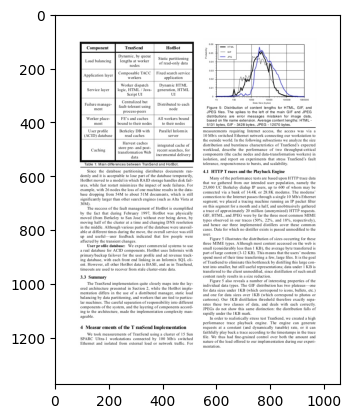

In [12]:
! wget https://nlp.johnsnowlabs.com/assets/images/ocr/table_regions1.png
image_path = '/content/table_regions1.png'
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

#### Or predict on an array of file paths

In [13]:
dfs = p.predict('/content/table_image.jpg','/content/table_regions1.png' )
for df in dfs :
  print(dfs.to_markdown())

|    | col0                | col1                                                    | col2                                                        |
|---:|:--------------------|:--------------------------------------------------------|:------------------------------------------------------------|
|  0 | Component           | TranSend                                                |                                                             |
|  1 | Load balancing      | Dynamic, by queueIengths at workernodes.                | Static partitioningof read-only data                        |
|  2 | Application layer   | ‘Composable TACCworkers                                 | Fixed search serviceapplication                             |
|  3 |                     | Wovias disney                                           | Dynamic HTML                                                |
|  4 | BS § Service layer  | logic, HTML / Java-                                     | generation, HTML   